In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.graphics.mosaicplot as stm

In [9]:
titanic = pd.read_csv("C:/Users/chera/Desktop/train.csv")

In [18]:
titanic.head(10) # шапка датафрейма с 10 первыми значениями и названия переменных. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [33]:
titanic.info() # общая информация о типах данных, названии переменных и т.д. Переменные Ticket, Name, PassengerId - не содержат полезной информации и при дальнейшем анализе могут быть исключены из датафрейма.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
titanic.describe().T # оцениваем основные описательные характеристики; замечаем, что переменные: Pclass, SibSp, Parch, Survived - явно носят факторный характер (имеют несколько градаций).

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [23]:
# для факторных и текстовых переменных оцениваем распределение
titanic["Sex"].value_counts()
# мужчин на борту было почти в два раза больше чем женщин

male      577
female    314
Name: Sex, dtype: int64

In [29]:
titanic["Sex"].value_counts(normalize = True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [30]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
titanic["Survived"].value_counts(normalize = True)
# большая часть пассажиров корабля погибло

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [25]:
titanic["Parch"].value_counts() # содержит информацию о количестве детей/родителей у пассажира на борту судна

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [26]:
titanic["SibSp"].value_counts() # содержит информацию о количестве братьев(сестёр)/супругов у пассажира на борту судна

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [28]:
titanic["Pclass"].value_counts() # класс, в котором путешестовал пассажир

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [32]:
titanic["Pclass"].value_counts(normalize = True)
# большая часть плыла третьим классом; остальные примерно пополам в первом или втором

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [37]:
# Оцениваем содержание NaN в датафрейме
titanic.isnull().sum().sum()

866

In [43]:
titanic.isnull().sum() # большая часть NaN приходится на переменную Cabin, поэтому в дальнейшем анализе её также можно исключить.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
titanic_mode = titanic.drop(columns = ["PassengerId", "Ticket", "Name", "Cabin"]) # удаляем переменные, которые не имеют рспределения и характеризуют индивидуальный объект
titanic_mode["dummy_sex"] = titanic_mode["Sex"].map({"female":0, "male":1})

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'dummy_sex'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

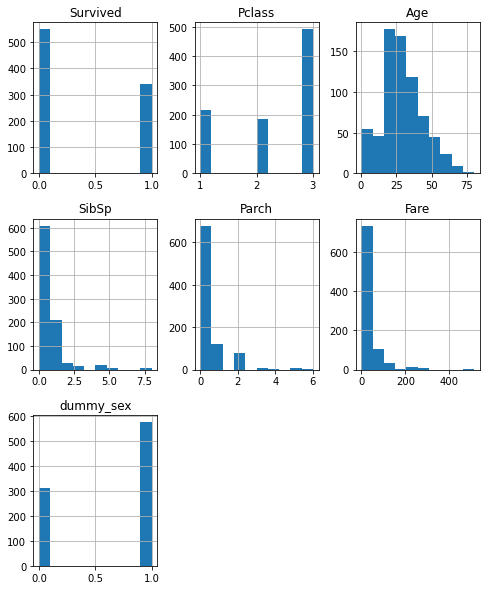

In [82]:
titanic_mode.hist(figsize = (8,10))

<AxesSubplot:>

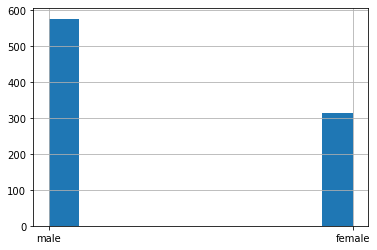

In [77]:
titanic_mode["Sex"].hist()

In [88]:
titanic_mode.corr().style.background_gradient(cmap = "coolwarm") # на графике корреляций видно, что переменная Survived более всего коррелирует с переменными Pclass и Sex. Переменная Age иммеет наибольшую корреляцию с Pclass и SibSp. Также наблюдается корреляция между Fare (транспортные расходы) и Pclass. Коэфициент корреляции для переменных SibSp и Parch тажке выше 0.4

,Survived,Pclass,Age,SibSp,Parch,Fare,dummy_sex
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333
dummy_sex,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000


In [89]:
titanic_mode.pivot_table(values = ["Survived", "Age"], index=["Sex", "Pclass"], aggfunc = "mean") # Из ьалицы видно, что чем выше был класс пассажира тем в среднем он был старше и более вероятно выживал. Также заметно, что женщин выжило значительно больше чем мужчин.

Age  Survived
Sex    Pclass                     
female 1       34.611765  0.968085
       2       28.722973  0.921053
       3       21.750000  0.500000
male   1       41.281386  0.368852
       2       30.740707  0.157407
       3       26.507589  0.135447